Indian Liver Patient Dataset (ILPD)

In [74]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [75]:
df = pd.read_csv("Indian_Liver_Patient_Dataset_(ILPD).csv")
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [77]:
display(df[df.Age > 80])

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Class
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.1,2
44,85,Female,1.0,0.3,208,17,15,7.0,3.6,1.0,2
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.7,1


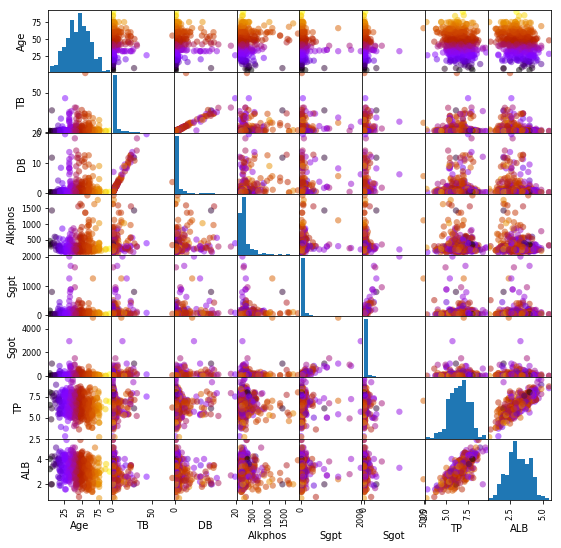

In [43]:
# plotting a scatter matrix
from matplotlib import cm

X = df[['Age','TB', 'DB', 'Alkphos', 'Sgpt','Sgot','TP','ALB']]
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()

#### HISTOGRAMAS

In [10]:
# Nº total de valores diferentes en cada variable para tener en cuenta en el intervalo del histograma
print(df.nunique())

Age         72
Gender       2
TB         113
DB          80
Alkphos    263
Sgpt       152
Sgot       177
TP          58
ALB         40
AG          69
Class        2
dtype: int64


Age


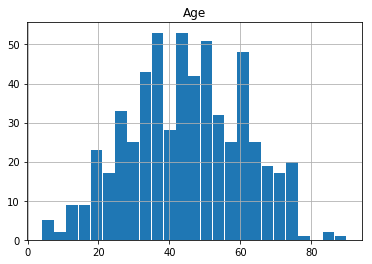

Gender
Gender skipped
TB


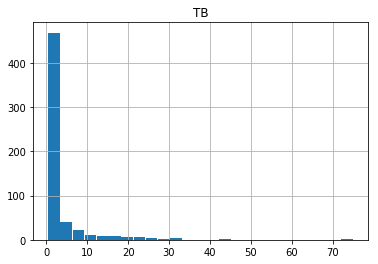

DB


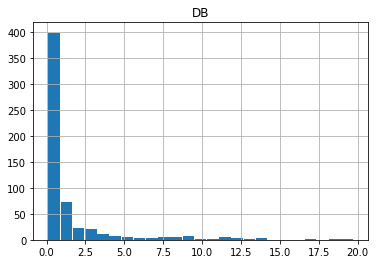

Alkphos


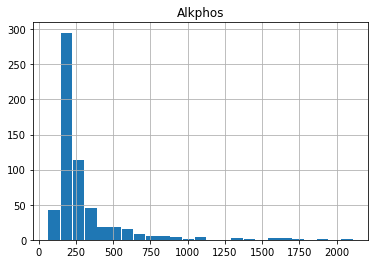

Sgpt


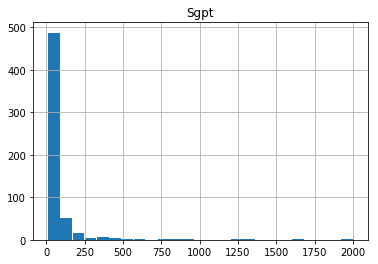

Sgot


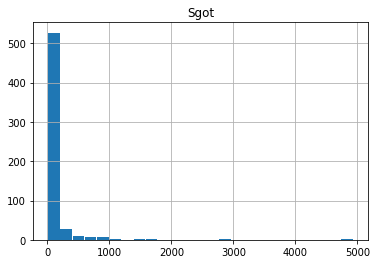

TP


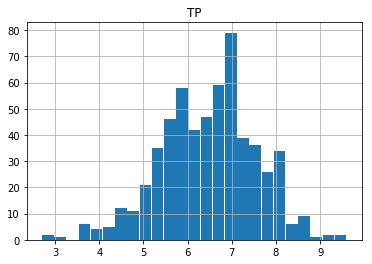

ALB


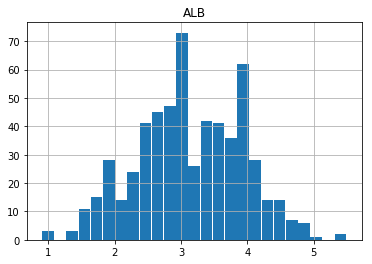

AG


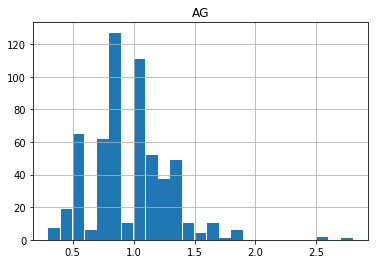

Class


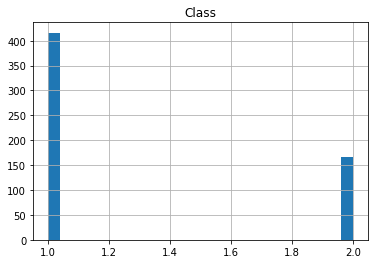

In [42]:
def print_hist(column,bins,width):
    try:
        hist=df.hist(column=column,bins=bins,rwidth=width)#1
        plt.show(hist)
    except Exception:
        print(column, 'skipped')

for elem in df:
    print(elem)
    bins=25
    width=0.95
    print_hist(elem,bins,width)

In [ ]:
'''for column in df:
    df[column].nunique()'''
hist1=df.hist(column='Age',bins=4,rwidth=0.95)#1
plt.show(hist1)
print(min(df.Age),max(df.Age))
hist3=df.hist(column='TB',bins=30,rwidth=0.95)#2.5
plt.show(hist3)
print(min(df.TB),max(df.TB))
hist4=df.hist(column='DB',bins=40,rwidth=0.95)#.5
plt.show(hist4)
print(min(df.DB),max(df.DB))
hist5=df.hist(column='Alkphos',bins=41,rwidth=0.95)#50
plt.show(hist5)
print(min(df.Alkphos),max(df.Alkphos))
hist6=df.hist(column='Sgpt',bins=40,rwidth=0.95)#50
plt.show(hist6)
print(min(df.Sgpt),max(df.Sgpt))
hist7=df.hist(column='Sgot',bins=50,rwidth=0.95)#100
plt.show(hist7)
print(min(df.Sgpt),max(df.Sgot))
hist8=df.hist(column='TP',bins=28,rwidth=0.95)#.25
plt.show(hist8)
print(min(df.TP),max(df.TP))
hist9=df.hist(column='ALB',bins=23,rwidth=0.95)#.2
plt.show(hist9)
print(min(df.ALB),max(df.ALB))
hist10=df.hist(column='AG',bins=50,rwidth=0.95)#.05
plt.show(hist10)
print(min(df.AG),max(df.AG))

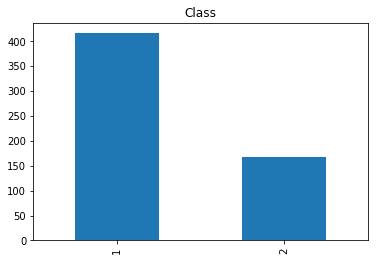

In [49]:
def count_values(column):
    df[column].value_counts().plot.bar(title=column)
    plt.show()
count_values('Class')

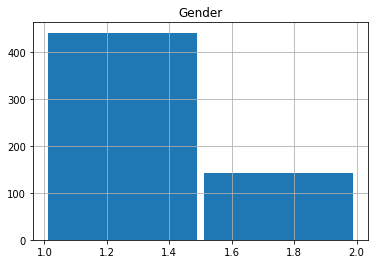

In [61]:
#gender es una variable categorica y hay que sustituir los valore por 0 y 1
df.Gender = df.Gender.replace({"Female": 0, "Male": 1})
hist2=df.hist(column='Gender',bins=2,rwidth=0.95)#.05
plt.show(hist2)

#### Valores nulos

In [60]:
df.isnull().sum()

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
AG         4
Class      0
dtype: int64

#### DIAGRAMA DE CAJAS

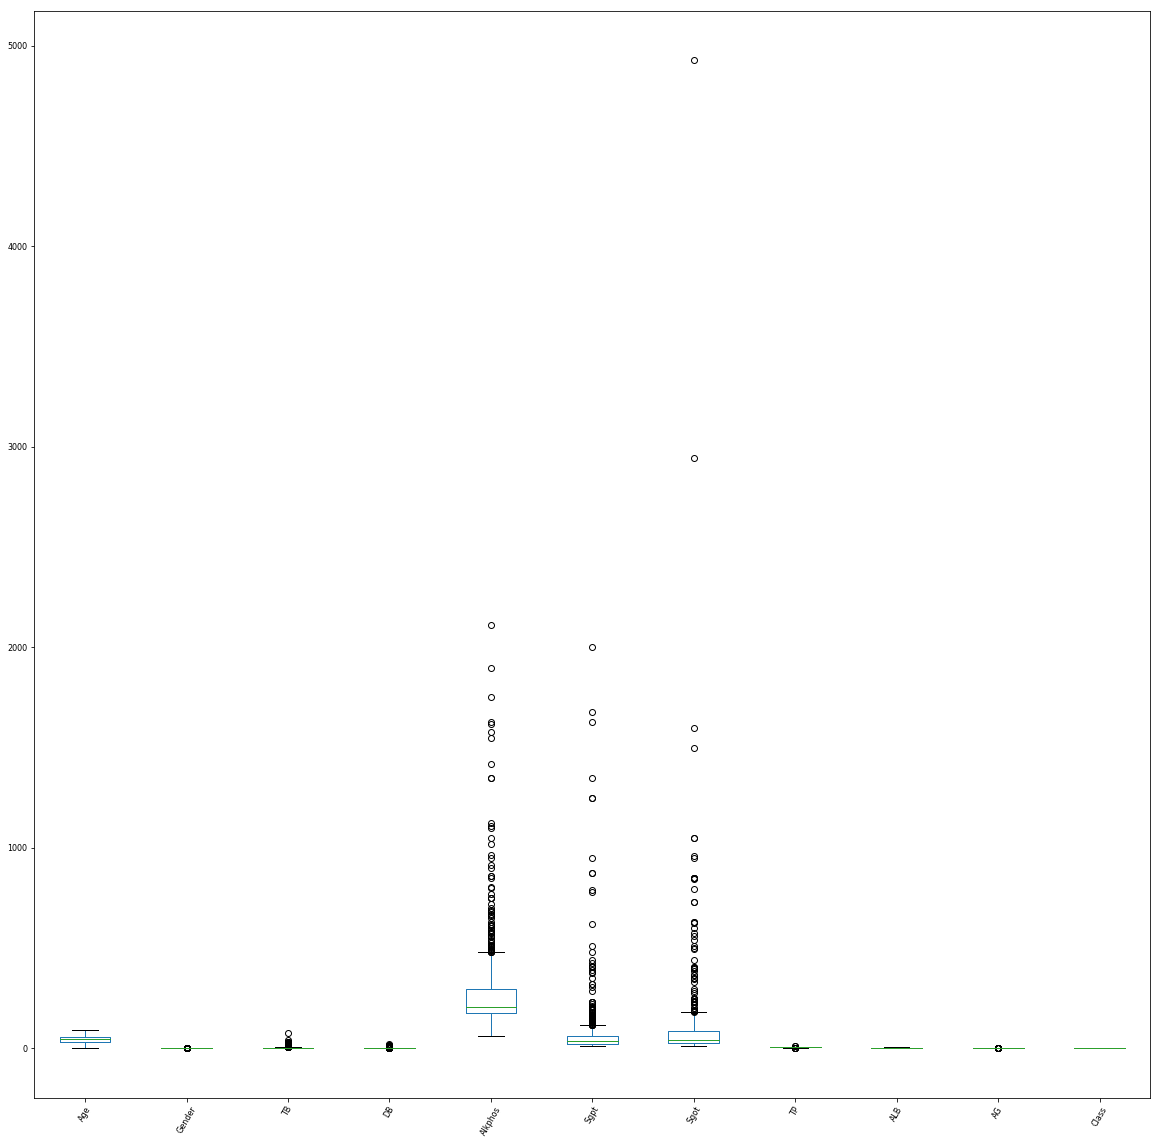

In [9]:
size = 1000
boxplot = df.boxplot(grid=False, rot=60, fontsize=8, figsize=(20,20))

#### DIAGRAMA DE DISPERSIÓN

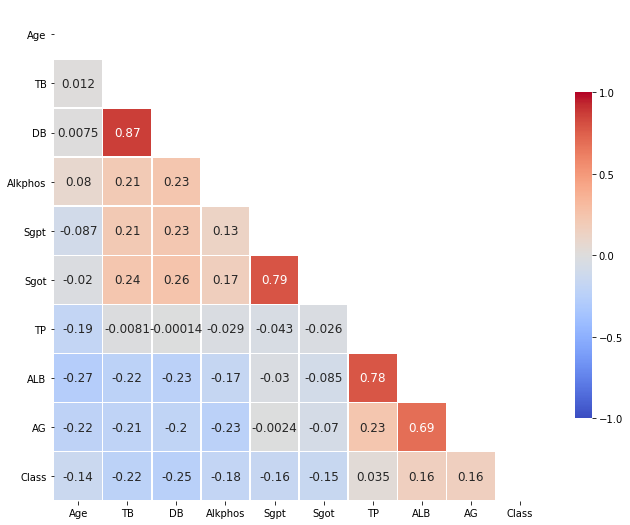

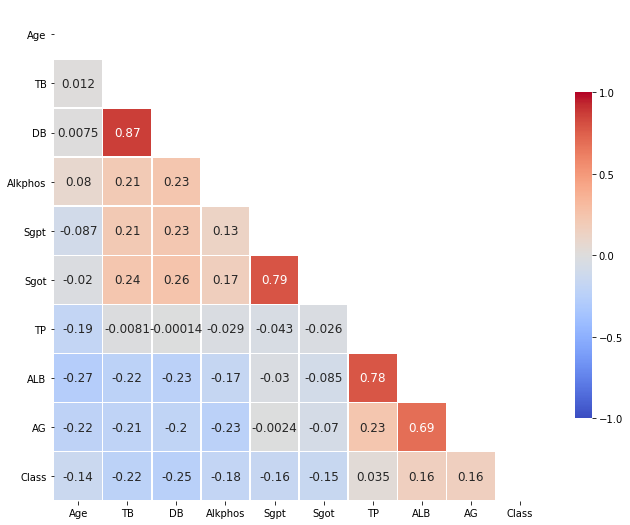

In [38]:
corr_matrix = df.corr()


#Mask para solo tener el triangulo de abajo
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

#bonitp
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()


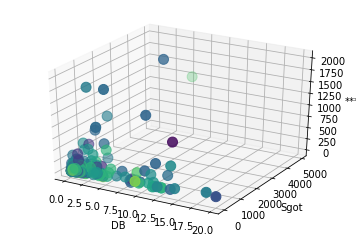

In [39]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['DB'], X_train['Sgot'], X_train['Sgpt'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('DB')
ax.set_ylabel('Sgot')
ax.set_zlabel('***')
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


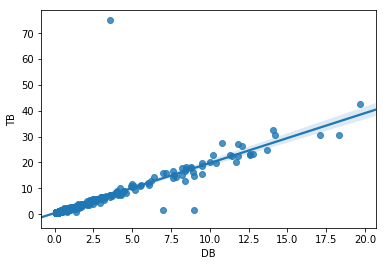

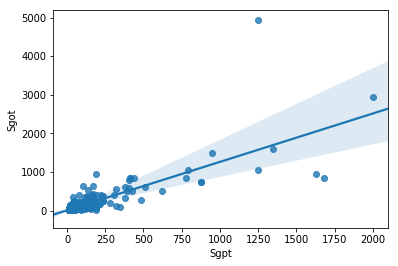

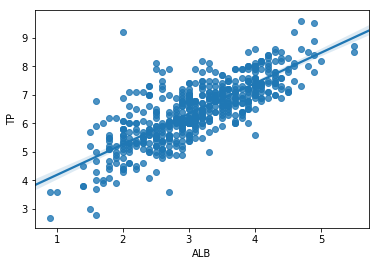

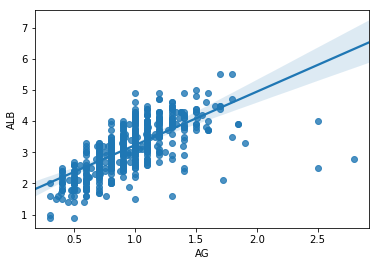

In [11]:
#mucha correlacion lineal
cor1=sns.regplot(x='DB', y='TB', data=df)
plt.show(cor1)
cor2=sns.regplot(x='Sgpt', y='Sgot', data=df)
plt.show(cor2)
cor3=sns.regplot(x='ALB', y='TP', data=df)
plt.show(cor3)
cor4=sns.regplot(x='AG', y='ALB', data=df)
plt.show(cor4)

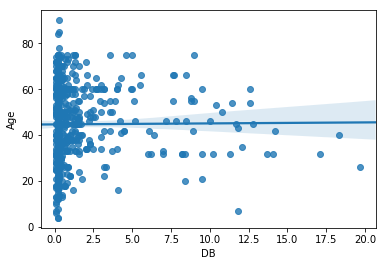

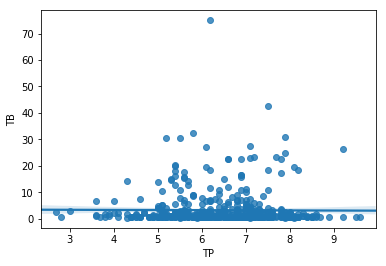

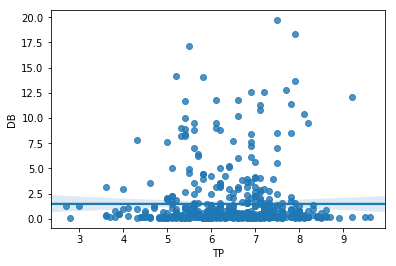

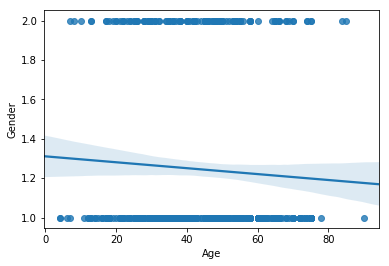

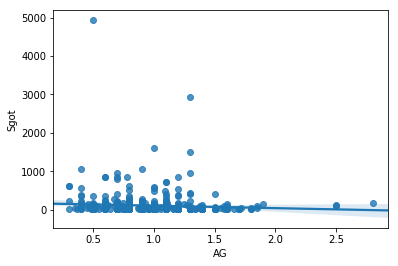

In [71]:
#no lineal
cor1=sns.regplot(x='DB', y='Age', data=df)
plt.show(cor1)
cor2=sns.regplot(x='TP', y='TB', data=df)
plt.show(cor2)
cor3=sns.regplot(x='TP', y='DB', data=df)
plt.show(cor3)
cor4=sns.regplot(x='Age', y='Gender', data=df)
plt.show(cor4)
cor5=sns.regplot(x='AG', y='Sgot', data=df)
plt.show(cor5)

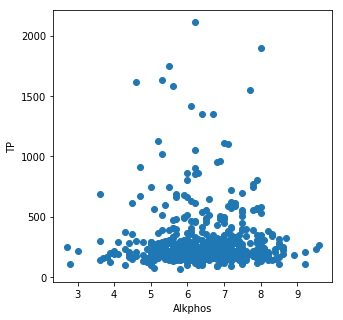

In [9]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.scatter(df['TP'],df['Alkphos'])
plt.ylabel('TP')
plt.xlabel('Alkphos')
plt.show()

#### OUTLIERS

In [77]:
def delete_outliers(df):
    variable_without_outliers=[]
    threshold=3
    mean1=np.mean(df)
    std1=np.std(df)
    print(std1)

    for y in df:
        z_score=(y-mean1)/std1
        if np.abs(z_score)>threshold:
            variable_without_outliers.append(None)
        else:
            variable_without_outliers.append(y)
    return  variable_without_outliers

In [73]:
filt_df=df
col_name=list(df.columns) 
print(col_name)

['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Class']


In [78]:
filt_df['TB']=delete_outliers(df['TB'])
filt_df['DB']=delete_outliers(df['DB'])
filt_df['Alkphos']=delete_outliers(df['Alkphos'])
filt_df['Sgpt']=delete_outliers(df['Sgpt'])
filt_df['Sgot']=delete_outliers(df['Sgot'])
filt_df['TP']=delete_outliers(df['TP'])
filt_df['ALB']=delete_outliers(df['ALB'])
filt_df['AG']=delete_outliers(df['AG'])

3.6241898914432173
1.8179070664664734
147.4181220047175
74.08532460217312
138.8701480360443
1.0549534368228997
0.7948362500202816
0.29679165445969913


In [75]:
filt_df.to_csv('BaseDatos_Mod1.csv')

#### Missing Values

In [76]:
df.isnull().sum()

Age         0
Gender      0
TB         17
DB         19
Alkphos    15
Sgpt       11
Sgot        6
TP          3
ALB         0
AG          7
Class       0
dtype: int64

#### Imputar

In [18]:
for column in filt_df:
    if len(filt_df[pd.isnull(filt_df[column])]) !=0:
         filt_df[column] = filt_df[column].fillna(filt_df[column].mean())

In [19]:
df.isnull().sum()

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
AG         0
Class      0
dtype: int64

#### HISTOGRAMAS

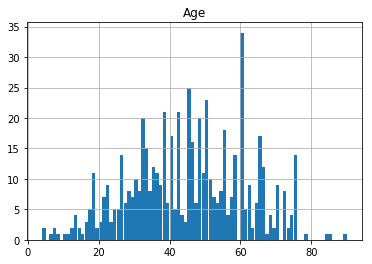

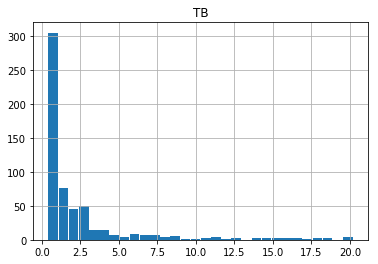

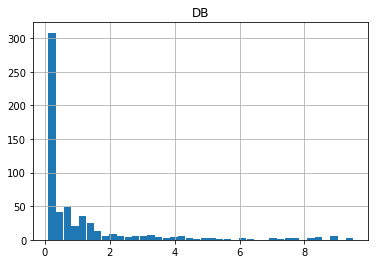

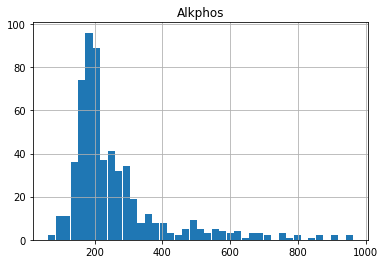

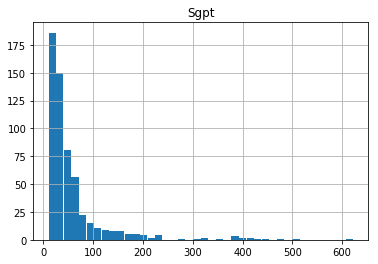

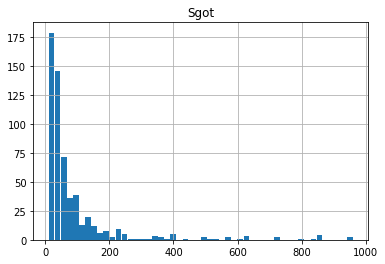

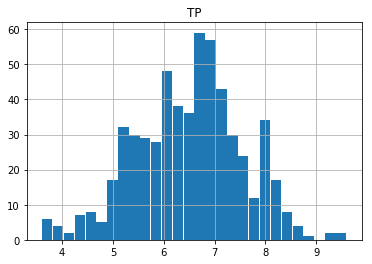

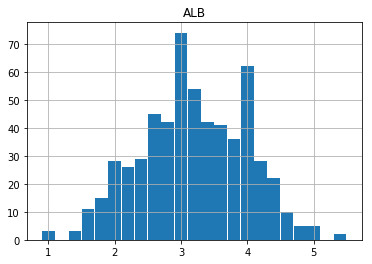

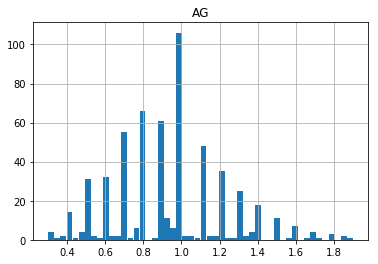

In [20]:
hist1=filt_df.hist(column='Age',bins=86,rwidth=0.95)#1
plt.show(hist1)

hist3=filt_df.hist(column='TB',bins=30,rwidth=0.95)#2.5
plt.show(hist3)

hist4=filt_df.hist(column='DB',bins=40,rwidth=0.95)#.5
plt.show(hist4)

hist5=filt_df.hist(column='Alkphos',bins=41,rwidth=0.95)#50
plt.show(hist5)

hist6=filt_df.hist(column='Sgpt',bins=40,rwidth=0.95)#50
plt.show(hist6)

hist7=filt_df.hist(column='Sgot',bins=50,rwidth=0.95)#100
plt.show(hist7)

hist8=filt_df.hist(column='TP',bins=28,rwidth=0.95)#.25
plt.show(hist8)

hist9=filt_df.hist(column='ALB',bins=23,rwidth=0.95)#.2
plt.show(hist9)

hist10=filt_df.hist(column='AG',bins=50,rwidth=0.95)#.05
plt.show(hist10)


#### NORMALIZAR 

In [21]:
print(col_name)

['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Class']


In [32]:
NOR_df=filt_df
NOR_df['Age']=(filt_df['Age']-min(filt_df['Age']))/(max(filt_df['Age'])-min(filt_df['Age']))
NOR_df['TB']=(filt_df['TB']-min(filt_df['TB']))/(max(filt_df['TB'])-min(filt_df['TB']))
NOR_df['DB']=(filt_df['DB']-min(filt_df['DB']))/(max(filt_df['DB'])-min(filt_df['DB']))
NOR_df['Alkphos']=(filt_df['Alkphos']-min(filt_df['Alkphos']))/(max(filt_df['Alkphos'])-min(filt_df['Alkphos']))
NOR_df['Sgpt']=(filt_df['Sgpt']-min(filt_df['Sgpt']))/(max(filt_df['Sgpt'])-min(filt_df['Sgpt']))
NOR_df['Sgot']=(filt_df['Sgot']-min(filt_df['Sgot']))/(max(filt_df['Sgot'])-min(filt_df['Sgot']))
NOR_df['TP']=(filt_df['TP']-min(filt_df['TP']))/(max(filt_df['TP'])-min(filt_df['TP']))
NOR_df['ALB']=(filt_df['ALB']-min(filt_df['ALB']))/(max(filt_df['ALB'])-min(filt_df['ALB']))
NOR_df['AG']=(filt_df['AG']-min(filt_df['AG']))/(max(filt_df['AG'])-min(filt_df['AG']))


PARTICIONES

In [33]:
mask = NOR_df.index<=  int(len(NOR_df)*0.8)
df_entrenamiento = NOR_df[mask] 
df_test = NOR_df[~mask]
df_entrenamiento.to_csv('SubconjuntoTraining.csv')
df_test.to_csv('SubconjuntoTest.csv')

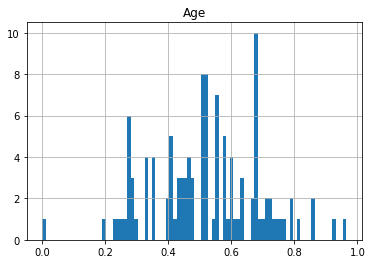

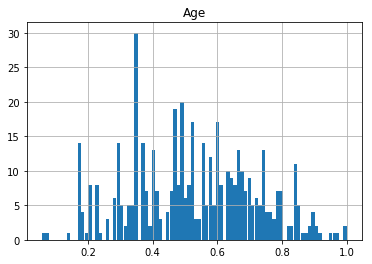

In [36]:
hist1=df_test.hist(column='Age',bins=86,rwidth=0.95)#1
plt.show(hist1)
hist2=df_entrenamiento.hist(column='Age',bins=86,rwidth=0.95)#1
plt.show(hist2)

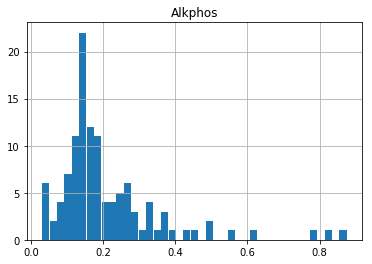

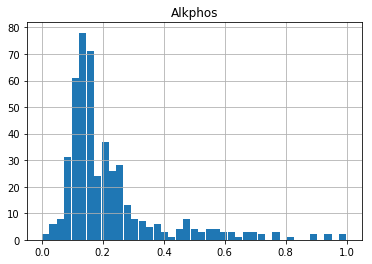

In [38]:
hist1=df_test.hist(column='Alkphos',bins=41,rwidth=0.95)#1
plt.show(hist1)
hist2=df_entrenamiento.hist(column='Alkphos',bins=41,rwidth=0.95)#1
plt.show(hist2)

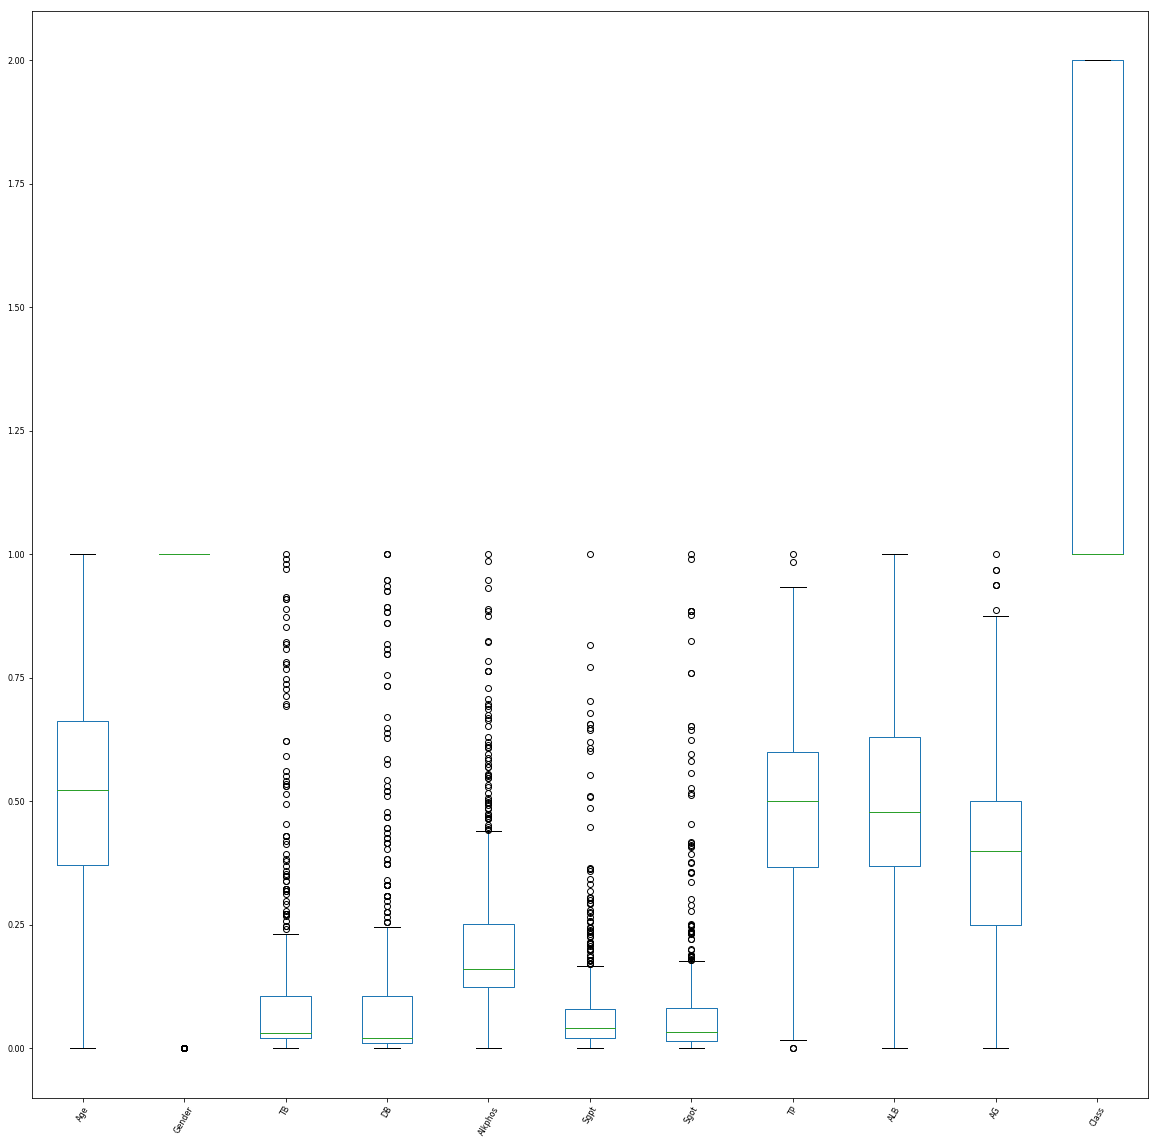

In [39]:
size = 1000
boxplot = NOR_df.boxplot(grid=False, rot=60, fontsize=8, figsize=(20,20))

---

In [68]:
# For this example, we use the mass, width, and height features of each fruit instance
X = df[['DB', 'TP','Sgot']]
y = df['Age']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knn.score(X_test, y_test)

0.075342465753424653

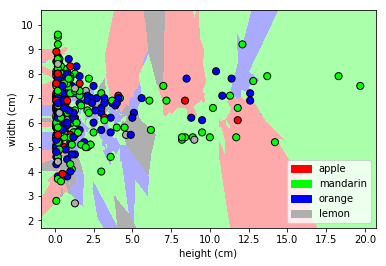

In [73]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

n_neighbors=5
weights='uniform'

X=X_train
y=y_train
X_mat = X[['DB', 'TP']].as_matrix()
y_mat = y.as_matrix()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map
# to each mesh point.

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                     numpy.arange(y_min, y_max, mesh_step_size))
Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='apple')
patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
patch2 = mpatches.Patch(color='#0000FF', label='orange')
patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
plt.legend(handles=[patch0, patch1, patch2, patch3])


plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
#plt.title('makes no sense. Just trying')

plt.show()

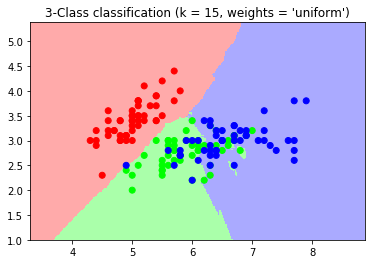

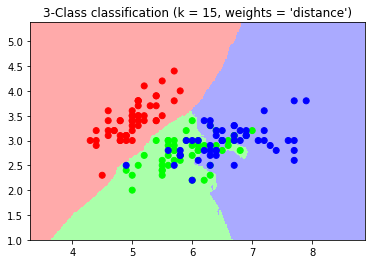

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()